# Forest Cover Type Classification

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [22]:
import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [23]:
covertype = pd.read_csv('covertype.csv')

# Exploring the data

In [24]:
covertype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225393 entries, 0 to 225392
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Unnamed: 0                          225393 non-null  int64
 1   Unnamed: 1                          225393 non-null  int64
 2   Unnamed: 2                          225393 non-null  int64
 3   Elevation                           225393 non-null  int64
 4   Aspect                              225393 non-null  int64
 5   Slope                               225393 non-null  int64
 6   Horizontal_Distance_To_Hydrology    225393 non-null  int64
 7   Vertical_Distance_To_Hydrology      225393 non-null  int64
 8   Horizontal_Distance_To_Roadways     225393 non-null  int64
 9   Hillshade_9am                       225393 non-null  int64
 10  Hillshade_Noon                      225393 non-null  int64
 11  Hillshade_3pm                       225393 non-null 

In [25]:
# all the features contain integer values 

In [26]:
covertype.isnull().sum()

Unnamed: 0                            0
Unnamed: 1                            0
Unnamed: 2                            0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area                       0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [27]:
covertype.describe()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,225393.000000,225393.000000,225393.000000,225393.000000,225393.000000,225393.000000,225393.000000,225393.000000,225393.000000,225393.000000,...,225393.000000,225393.000000,225393.000000,225393.000000,225393.000000,225393.000000,225393.000000,225393.000000,225393.000000,225393.000000
mean,2936.793427,140.105669,11.689542,243.023528,33.925526,3339.298523,216.777766,224.311221,140.040618,2604.023514,...,0.007680,0.015617,0.000098,0.000466,0.000044,0.000151,0.018124,0.010590,0.005080,1.900818
std,219.961442,109.846312,6.530306,185.145577,43.299889,1730.140123,21.446072,16.788897,32.434065,1607.550317,...,0.087298,0.123989,0.009879,0.021579,0.006661,0.012281,0.133400,0.102363,0.071093,1.016501
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,30.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2803.000000,52.000000,7.000000,95.000000,5.000000,1786.000000,207.000000,216.000000,121.000000,1426.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2959.000000,102.000000,11.000000,210.000000,22.000000,3450.000000,221.000000,227.000000,140.000000,2266.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3086.000000,230.000000,15.000000,351.000000,50.000000,4806.000000,231.000000,235.000000,160.000000,3436.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3849.000000,360.000000,64.000000,1343.000000,601.000000,7117.000000,254.000000,254.000000,248.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [28]:
print("\nTarget distribution:")
covertype['Cover_Type'].value_counts()


Target distribution:


Cover_Type
2    142647
1     67879
5      4483
7      3091
3      2744
6      2389
4      2160
Name: count, dtype: int64

In [29]:
# Adjusting the Target Variable for XGBoost
covertype['Cover_Type'] = covertype['Cover_Type'] - 1

In [30]:
# dropping the unnamed features
covertype = covertype.drop(columns=['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'],axis=1)

# EDA

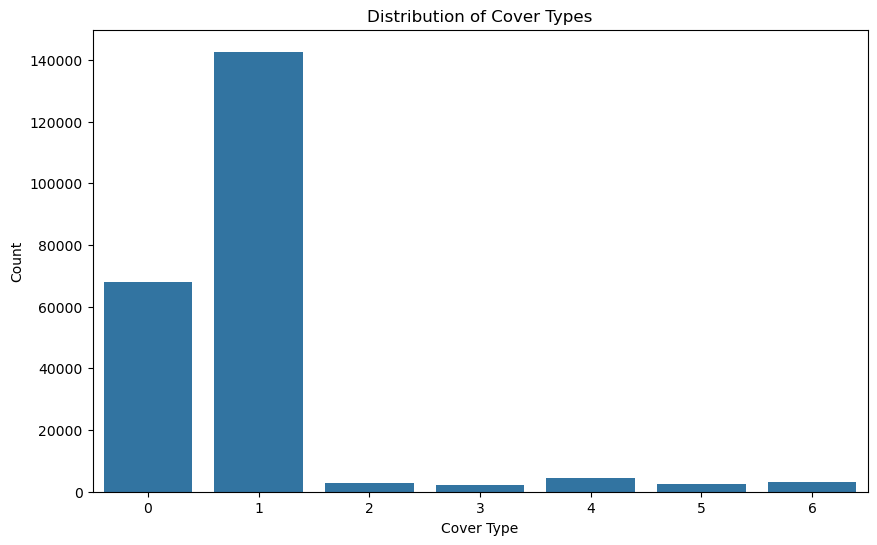

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Cover_Type', data=covertype)
plt.title('Distribution of Cover Types')
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.show()

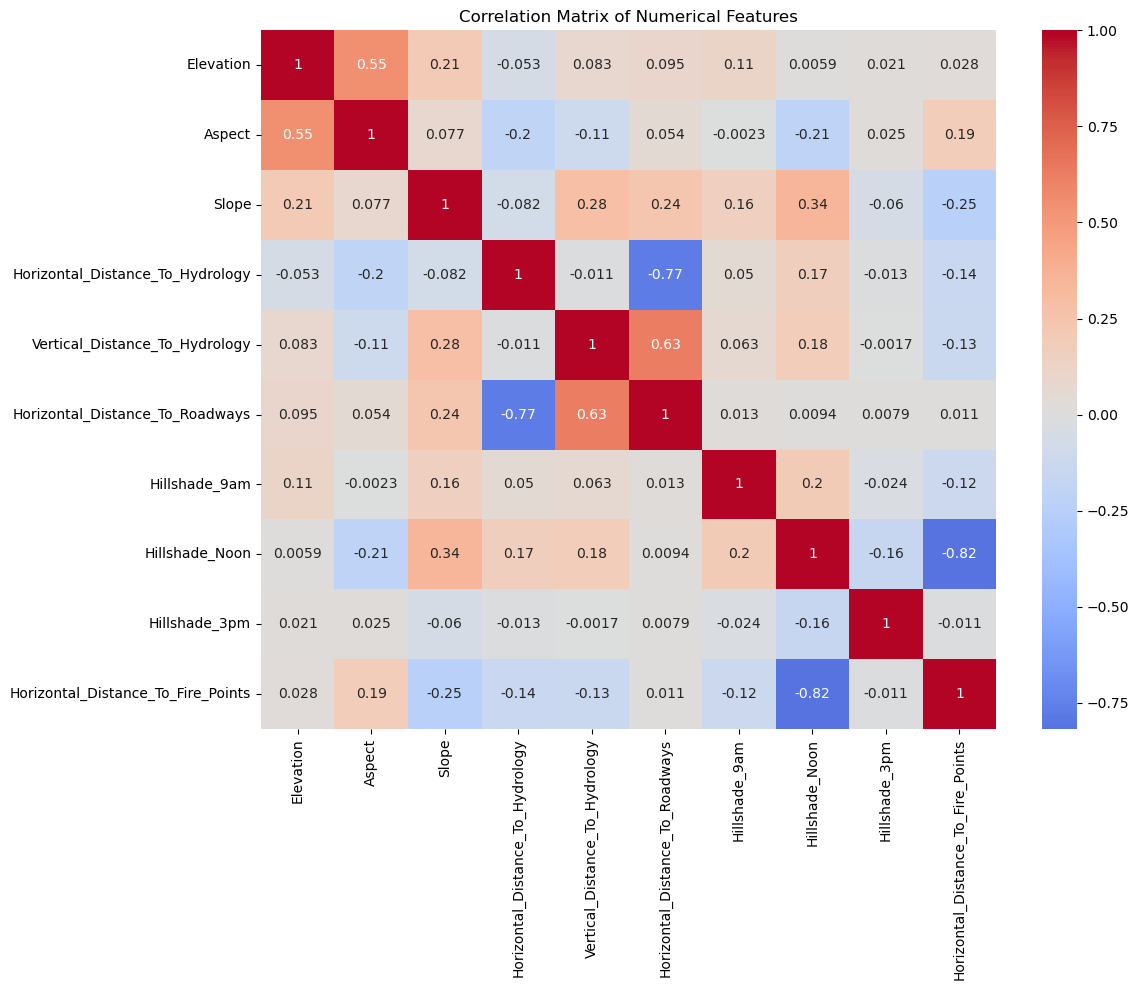

In [32]:
# Correlation matrix for numerical features
numerical_features = ['Elevation', 'Aspect', 'Slope', 
                     'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
                     'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
                     'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

plt.figure(figsize=(12, 10))
corr_matrix = covertype[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

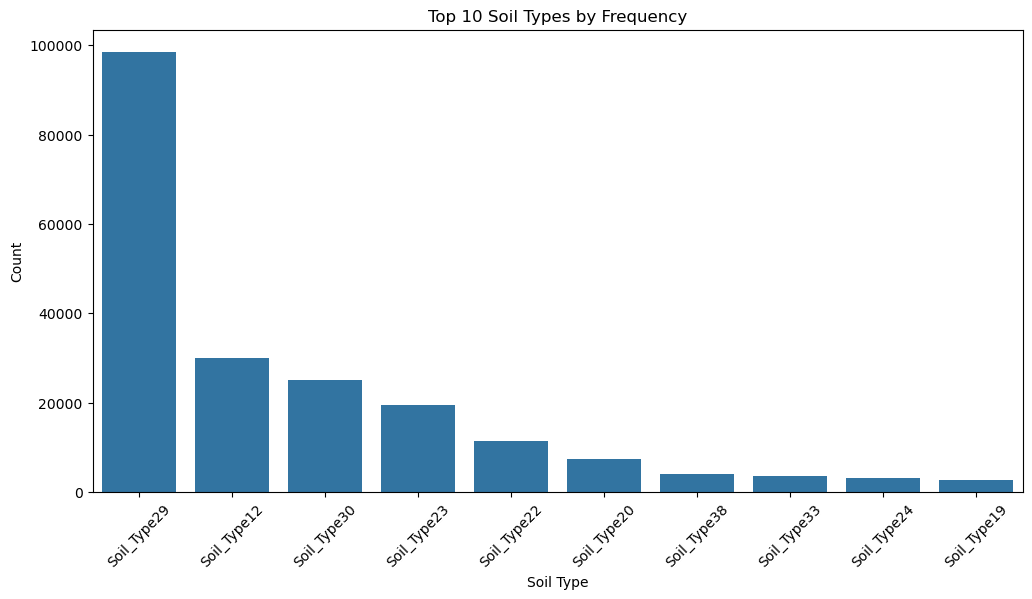

In [33]:
soil_types = [f'Soil_Type{i}' for i in range(1, 41)]
soil_counts = covertype[soil_types].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=soil_counts.index, y=soil_counts.values)
plt.title('Top 10 Soil Types by Frequency')
plt.xlabel('Soil Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [35]:
Q1 = covertype[numerical_features].quantile(0.25)
Q3 = covertype[numerical_features].quantile(0.75)
IQR = Q3 - Q1
outliers = ((covertype[numerical_features] < (Q1 - 1.5 * IQR)) | (covertype[numerical_features] > (Q3 + 1.5 * IQR))).sum()
print("\nOutliers:")
print(outliers)


Outliers:
Elevation                              3793
Aspect                                11614
Slope                                     0
Horizontal_Distance_To_Hydrology       8595
Vertical_Distance_To_Hydrology         7583
Horizontal_Distance_To_Roadways        5244
Hillshade_9am                          2752
Hillshade_Noon                        18059
Hillshade_3pm                           499
Horizontal_Distance_To_Fire_Points    12414
dtype: int64


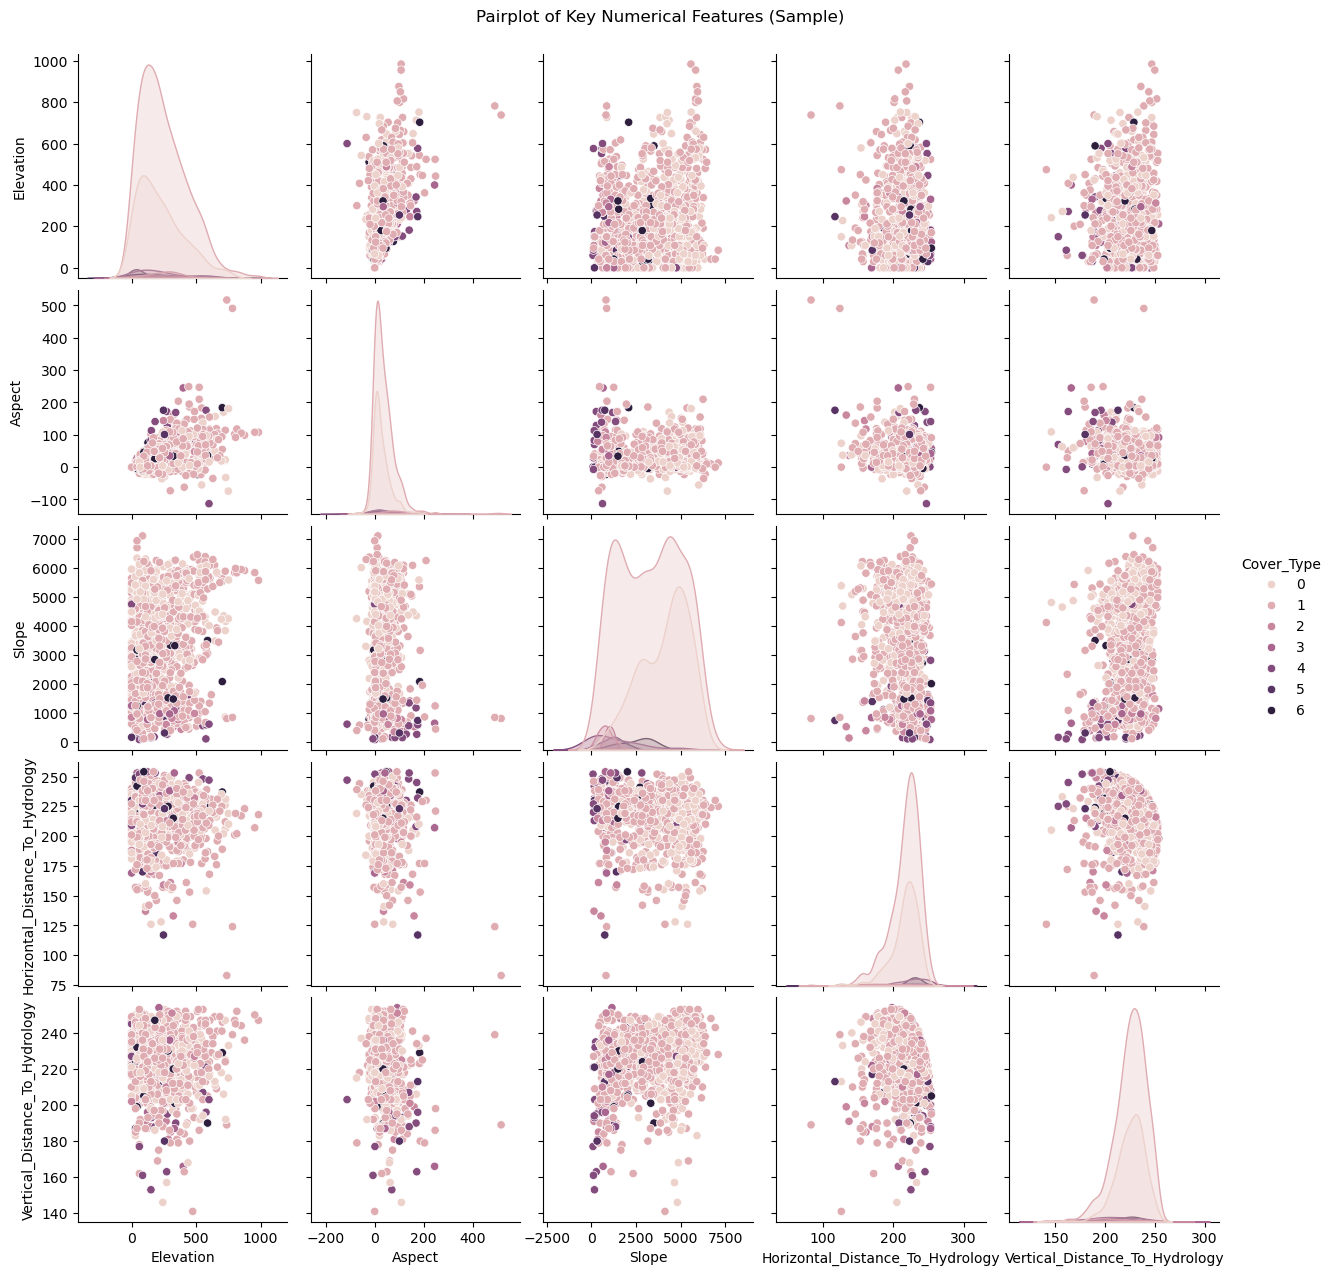

In [36]:
sample_df = covertype.sample(n=1000, random_state=42)
sns.pairplot(sample_df, vars=numerical_features[:5], hue='Cover_Type', diag_kind='kde')
plt.suptitle('Pairplot of Key Numerical Features (Sample)', y=1.02)
plt.show()

# Data Preprocessing

In [37]:
# no missing values and no categorical data

In [38]:
covertype.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,258,0,510,221,232,148,6279,1,0,0,...,0,0,0,0,0,0,0,0,0,4
1,212,-6,390,220,235,151,6225,1,0,0,...,0,0,0,0,0,0,0,0,0,4
2,268,65,3180,234,238,135,6121,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,242,118,3090,238,238,122,6211,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,153,-1,391,220,234,150,6172,1,0,0,...,0,0,0,0,0,0,0,0,0,4


In [39]:
# Data Splitting
X = covertype.drop('Cover_Type', axis=1)
y = covertype['Cover_Type']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training

In [42]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(random_state=42, eval_metric='mlogloss')
lr_model = LogisticRegression(multi_class='multinomial', random_state=42, max_iter=1000)
results = {}

In [43]:
# Train and evaluate Random Forest
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
results['Random Forest'] = accuracy_rf
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9313
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.94      0.87      0.90     13708
           1       0.93      0.97      0.95     28484
           2       0.84      0.81      0.82       514
           3       0.91      0.96      0.94       393
           4       0.91      0.80      0.85       868
           5       0.82      0.83      0.83       480
           6       0.93      0.88      0.90       632

    accuracy                           0.93     45079
   macro avg       0.90      0.87      0.88     45079
weighted avg       0.93      0.93      0.93     45079



In [44]:
# Train and evaluate XGBoost
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
results['XGBoost'] = accuracy_xgb
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.8652
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.86      0.72      0.78     13708
           1       0.87      0.94      0.90     28484
           2       0.80      0.78      0.79       514
           3       0.92      0.97      0.95       393
           4       0.87      0.77      0.82       868
           5       0.77      0.79      0.78       480
           6       0.91      0.83      0.87       632

    accuracy                           0.87     45079
   macro avg       0.86      0.83      0.84     45079
weighted avg       0.86      0.87      0.86     45079



In [45]:
# Train and evaluate Logistic Regression
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
results['Logistic Regression'] = accuracy_lr
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.7128
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.67      0.33      0.44     13708
           1       0.72      0.92      0.81     28484
           2       0.62      0.61      0.61       514
           3       0.81      0.86      0.83       393
           4       0.57      0.23      0.33       868
           5       0.55      0.42      0.48       480
           6       0.85      0.47      0.61       632

    accuracy                           0.71     45079
   macro avg       0.68      0.55      0.59     45079
weighted avg       0.70      0.71      0.68     45079



### Hyperparameter Tuning for Random Forest

In [ ]:
param_dist = {
    'n_estimators': [50, 100,150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(rf, param_dist, cv=2, scoring='accuracy', 
                                  n_jobs=-1, n_iter=3, random_state=42)
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

best_rf = random_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Best Random Forest Test Accuracy: {best_accuracy:.4f}")

# Visualizations

In [ ]:
#Feature Importance
best_model = rf_model

plt.figure(figsize=(12, 8))
feature_importance = best_model.feature_importances_
feature_names = X.columns
indices = np.argsort(feature_importance)[-15:]

plt.barh(range(len(indices)), feature_importance[indices])
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.title('Top 15 Important Features - Random Forest')
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

print("Top 5 Features:")
top_features = pd.Series(best_model.feature_importances_, index=X.columns)
top_features = top_features.sort_values(ascending=False)
for i, (feature, importance) in enumerate(top_features.head().items()):
    print(f"  {i+1}. {feature}: {importance:.4f}")

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[f'Class {i}' for i in range(7)],
            yticklabels=[f'Class {i}' for i in range(7)])
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

In [ ]:
model_names = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy')
plt.ylim(0.5, 1.0)

for i, acc in enumerate(accuracies):
    ax.text(i, acc, f'{acc:.4f}', ha='center')

plt.tight_layout()
plt.show()